# Импорт

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [303]:

df = pd.read_csv('report.csv')
df

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,2015,OK07205,"Tulsa, OK",401520.0,3628.0,55.0,365.0,2354.0,854.0,NaN,903.57,13.70,90.90,586.27,212.69
2825,2015,VA12800,"Virginia Beach, VA",452797.0,626.0,19.0,103.0,234.0,270.0,NaN,138.25,4.20,22.75,51.68,59.63
2826,2015,DCMPD00,"Washington, DC",672228.0,8084.0,162.0,494.0,4024.0,3404.0,NaN,1202.57,24.10,73.49,598.61,506.38
2827,2015,KS08703,"Wichita, KS",389824.0,3839.0,27.0,349.0,2730.0,733.0,NaN,984.80,6.93,89.53,700.32,188.03


# Чистка данных

Уберите ячейки с nan. В таблице это строчки с "подведением итогов" каждого года и неполная информация за 2015 год

Также в колонках "per capita" значения оказались домноженными на 10^5, так что это тоже следует исправить

In [304]:
df.dropna(axis= 'index',how='any',inplace=True)
df

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,2014,AZ01003,"Tucson, AZ",527328.0,3443.0,35.0,399.0,2021.0,988.0,12.0,652.91,6.64,75.66,383.25,187.36
2755,2014,OK07205,"Tulsa, OK",399556.0,3217.0,46.0,313.0,1938.0,920.0,12.0,805.14,11.51,78.34,485.04,230.26
2756,2014,VA12800,"Virginia Beach, VA",451102.0,667.0,17.0,115.0,285.0,250.0,12.0,147.86,3.77,25.49,63.18,55.42
2757,2014,DCMPD00,"Washington, DC",658893.0,7810.0,105.0,470.0,4004.0,3231.0,12.0,1185.32,15.94,71.33,607.69,490.37


In [305]:
df[['crimes_percapita','homicides_percapita','rapes_percapita','assaults_percapita','robberies_percapita']] = df[['crimes_percapita','homicides_percapita','rapes_percapita','assaults_percapita','robberies_percapita']]/(10**5)
df

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,0.008325,0.000105,0.000632,0.004727,0.002861
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,0.002472,0.000045,0.000249,0.001174,0.001005
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,0.016374,0.000377,0.000903,0.007171,0.007923
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,0.005238,0.000060,0.000377,0.003335,0.001466
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,0.004045,0.000110,0.000633,0.001541,0.001761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,2014,AZ01003,"Tucson, AZ",527328.0,3443.0,35.0,399.0,2021.0,988.0,12.0,0.006529,0.000066,0.000757,0.003832,0.001874
2755,2014,OK07205,"Tulsa, OK",399556.0,3217.0,46.0,313.0,1938.0,920.0,12.0,0.008051,0.000115,0.000783,0.004850,0.002303
2756,2014,VA12800,"Virginia Beach, VA",451102.0,667.0,17.0,115.0,285.0,250.0,12.0,0.001479,0.000038,0.000255,0.000632,0.000554
2757,2014,DCMPD00,"Washington, DC",658893.0,7810.0,105.0,470.0,4004.0,3231.0,12.0,0.011853,0.000159,0.000713,0.006077,0.004904


# Обзор данных

Посмотрите на статистики по датасету

In [306]:
# Your code here
df.describe()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2688.000000,2.688000e+03,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000
mean,1994.565104,7.931257e+05,9004.445312,125.644345,415.340774,4422.396949,4041.063244,11.886533,0.011092,0.000156,0.000594,0.005697,0.004645
std,11.566712,1.010316e+06,16007.228845,205.001170,480.924802,7028.064975,8744.855463,1.020882,0.006817,0.000124,0.000321,0.003714,0.003427
min,1975.000000,1.007630e+05,154.000000,1.000000,15.000000,15.000000,83.000000,0.000000,0.000165,0.000002,0.000016,0.000016,0.000115
25%,1985.000000,3.771285e+05,2973.250000,32.000000,176.000000,1464.250000,1035.000000,12.000000,0.006381,0.000071,0.000358,0.003202,0.002135
50%,1995.000000,5.341290e+05,5088.500000,63.000000,289.000000,2598.000000,1964.000000,12.000000,0.009689,0.000123,0.000560,0.004910,0.003789
75%,2005.000000,8.119650e+05,8829.250000,127.250000,464.000000,4568.000000,3649.250000,12.000000,0.014271,0.000205,0.000778,0.007302,0.006171
max,2014.000000,8.473938e+06,174542.000000,2245.000000,3899.000000,71030.000000,107475.000000,12.000000,0.043528,0.000947,0.001993,0.023682,0.023375


Такое описание данных выглядит неинформативно. Для многих столбцов оно вообще не имеет смысла. Более интересно посмотреть статистику, сгруппированную по годам/местам.

In [308]:
# Your code here
df_groupby_year = df.groupby('report_year').describe()


In [309]:
df_groupby_year['violent_crimes']

,count,mean,std,min,25%,50%,75%,max
report_year,,,,,,,,
1975,67.0,7522.492537,16946.745408,267.0,1693.00,3578.0,6457.50,132182.0
1976,67.0,7144.791045,17006.330934,274.0,1739.50,3285.0,6071.50,134153.0
1977,67.0,7053.552239,15482.871969,385.0,1884.00,3724.0,6061.00,121916.0
1978,67.0,7318.626866,15581.863407,450.0,2102.00,3607.0,7239.00,122685.0
1979,67.0,8109.656716,16849.596385,530.0,2285.50,4178.0,9201.00,132383.0
1980,67.0,9139.074627,19056.776876,530.0,2737.00,4693.0,11029.00,149549.0
1981,67.0,9313.910448,19889.849783,606.0,2744.00,4946.0,10319.00,156946.0
1982,67.0,9079.447761,18489.284024,607.0,2683.00,4901.0,9674.50,143943.0
1983,67.0,8842.029851,17525.625399,585.0,2590.00,4685.0,8254.50,132653.0


In [310]:
df_groupby_year['violent_crimes'].sort_values(by = 'mean')[['mean']]

,mean
report_year,
2014,6195.750000
2013,6213.338235
2011,6234.970588
2012,6349.088235
2010,6445.014706
2009,6823.323529
1977,7053.552239
1976,7144.791045
1978,7318.626866


In [311]:
# Your code here
df_groupby_loc = df.groupby('agency_jurisdiction').describe()

In [312]:
df_groupby_loc['crimes_percapita'].sort_values(by = 'mean')[['mean']]

,mean
agency_jurisdiction,
"Fairfax County, VA",0.001098
"Nassau County, NY",0.001587
"Suffolk County, NY",0.001900
"Virginia Beach, VA",0.002210
"Montgomery County, MD",0.002415
...,...
"Detroit, MI",0.022300
"Newark, NJ",0.022659
"St. Louis, MO",0.023628


In [313]:
df.columns

Index(['report_year', 'agency_code', 'agency_jurisdiction', 'population',
       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',
       'months_reported', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')

Сделайте вывод от тендециях и запишите тут ваш инсайд

80-90ые были в целом более криминогенные, чем 2010-ые
Atlanta, GA - самый опасный город
Fairfax County, VA - самый безопасный город

# Более детальный анализ

## Изменение уровня преступности по годам

Сперва, мне захотелось посмотреть на то как изменяются частоты различных преступлений. Ожидания - графики частот всех видов преступлений по времени будут иметь примерно одинаковые пики/падения.
Возьмём таблицу количеств происшествий по годам и перезапишем столбцы происшествий на душу населения.

In [314]:
df['violent_crimes_percapita'] = df['violent_crimes'] / df['population']
df.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,violent_crimes_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,0.008325,0.000105,0.000632,0.004727,0.002861,0.008325
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,0.002472,0.000045,0.000249,0.001174,0.001005,0.002472
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,0.016374,0.000377,0.000903,0.007171,0.007923,0.016374
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,0.005238,0.000060,0.000377,0.003335,0.001466,0.005238
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,0.004045,0.000110,0.000633,0.001541,0.001761,0.004045


In [315]:
# Your code here
df_group_year = df.groupby('report_year')['violent_crimes_percapita'].mean().reset_index().head()
df_group_year


,report_year,violent_crimes_percapita
0,1975,0.008733
1,1976,0.008221
2,1977,0.008545
3,1978,0.009189
4,1979,0.010322


Теперь мы получили таблицу, в которой число преступлений на душу населения за год расчитано правильно. Посмотрим на графики частот различных преступлений.

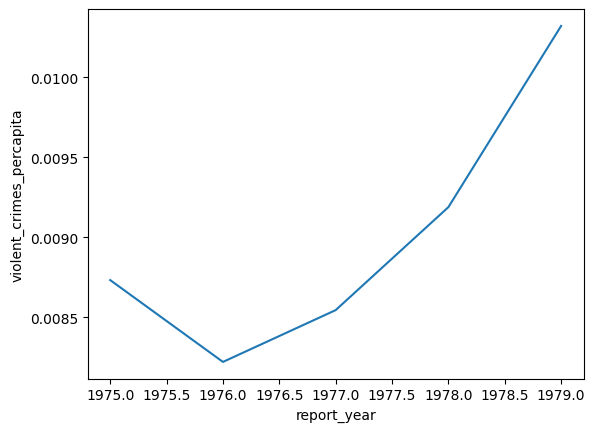

In [316]:
# Your code here
plt.plot(df_group_year['report_year'],df_group_year['violent_crimes_percapita'])
plt.xlabel('report_year')
plt.ylabel('violent_crimes_percapita')
plt.show()

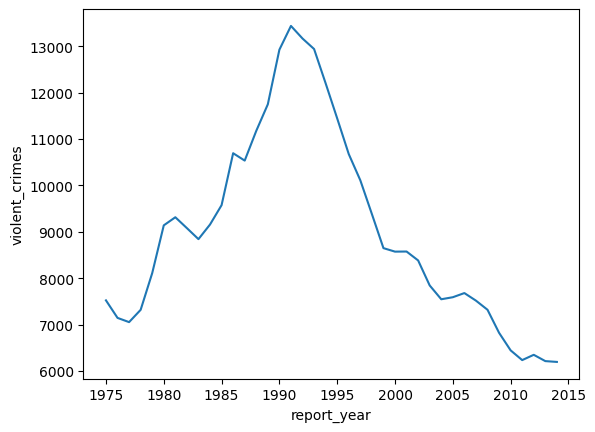

In [317]:
df_group_year = df.groupby('report_year')['violent_crimes'].mean().reset_index()
plt.plot(df_group_year['report_year'],df_group_year['violent_crimes'])
plt.xlabel('report_year')
plt.ylabel('violent_crimes')
plt.show()

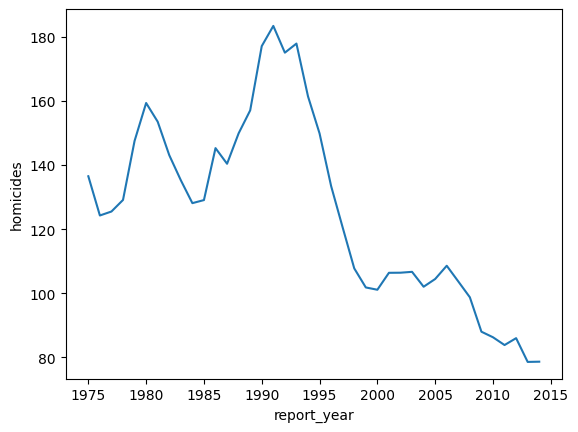

In [318]:
# Your code here
df_group_year = df.groupby('report_year')['homicides'].mean().reset_index()
plt.plot(df_group_year['report_year'],df_group_year['homicides'])
plt.xlabel('report_year')
plt.ylabel('homicides')
plt.show()

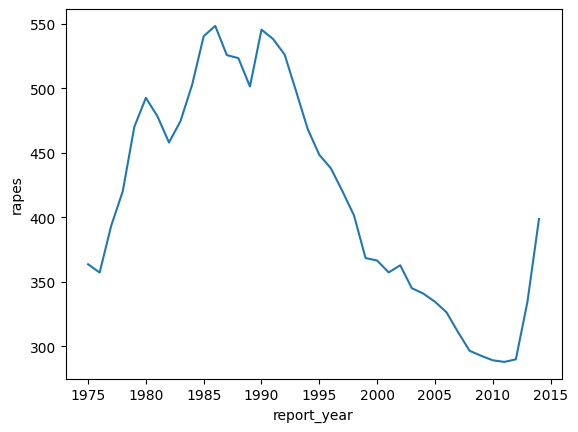

In [319]:
df_group_year = df.groupby('report_year')['rapes'].mean().reset_index()
plt.plot(df_group_year['report_year'],df_group_year['rapes'])
plt.xlabel('report_year')
plt.ylabel('rapes')
plt.show()

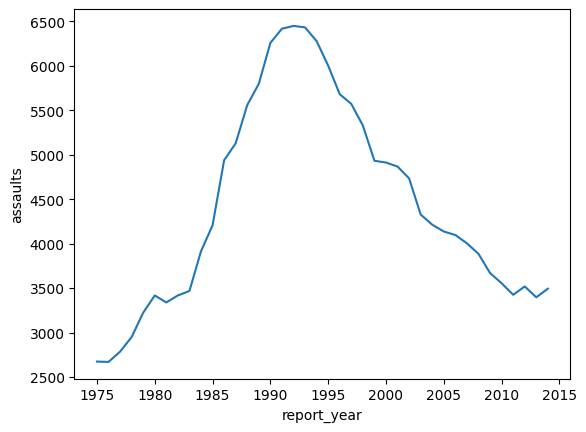

In [320]:
df_group_year = df.groupby('report_year')['assaults'].mean().reset_index()
plt.plot(df_group_year['report_year'],df_group_year['assaults'])
plt.xlabel('report_year')
plt.ylabel('assaults')
plt.show()

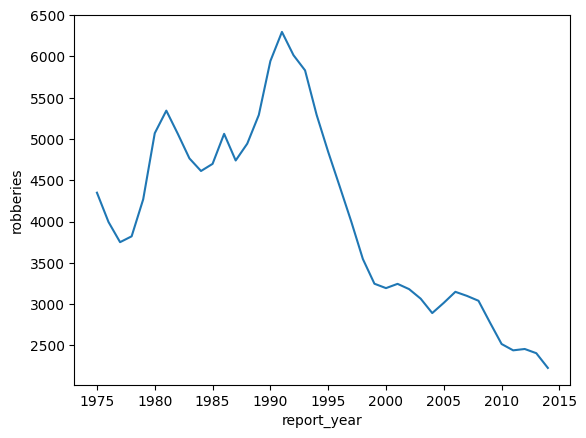

In [321]:
df_group_year = df.groupby('report_year')['robberies'].mean().reset_index()
plt.plot(df_group_year['report_year'],df_group_year['robberies'])
plt.xlabel('report_year')
plt.ylabel('robberies')
plt.show()

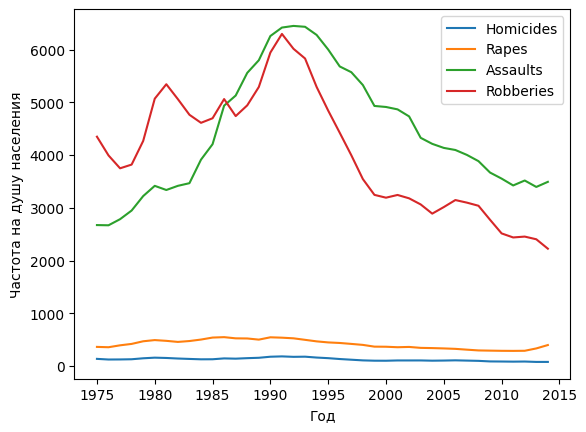

In [377]:





df_group_year = df.groupby('report_year')[['violent_crimes','homicides','rapes','assaults','robberies']].mean().reset_index()


# plt.plot(df_group_year['report_year'], df_group_year['violent_crimes'], label='Violent Crimes')
plt.plot(df_group_year['report_year'], df_group_year['homicides'], label='Homicides')
plt.plot(df_group_year['report_year'], df_group_year['rapes'], label='Rapes')
plt.plot(df_group_year['report_year'], df_group_year['assaults'], label='Assaults')
plt.plot(df_group_year['report_year'], df_group_year['robberies'], label='Robberies')

plt.xlabel('Год')
plt.ylabel('Частота на душу населения')
plt.legend()
plt.show()

Сделайте вывод о скачках преступности за всее время. Есть ли для всех видов схожие пики? С чем можно связать в экономическом смысле?

Рост преступлений продолжался до +- 95 года, затем пошел на спад. Но кол-во repas резко увеличилось в +- 2013. 
Видимо,в 90-ые были проведены реформы, которые у дали результаты и кол-во преступлений пошло на спад.

## Зависимость уровня преступности от численности населения территориальных субъектов

Если мы предполагаем, что преступления встречаются с примерно одинаковой частотой, то ожидаем увидеть линейную зависимость количества преступлений от населенности города.

Сперва я предлагаю посмотреть, как тенденция из предыдущего графика выполняется для городов с наибольшим и наименьшим числом жителей.

In [323]:
# Your code here
df_group_town = df.groupby('agency_jurisdiction')['population'].max().sort_values(ascending=False).reset_index()
df_group_town

,agency_jurisdiction,population
0,"New York City, NY",8473938.0
1,"Los Angeles, CA",3906772.0
2,"Chicago, IL",3150000.0
3,"Houston, TX",2273771.0
4,"Philadelphia, PA",1916665.0
...,...,...
63,"Newark, NJ",372663.0
64,"Tampa, FL",357124.0
65,"Aurora, CO",350948.0
66,"Orlando, FL",259675.0


In [329]:
df_NY = df.loc[df['agency_jurisdiction'] == 'New York City, NY']

In [330]:
df_SL = df.loc[df['agency_jurisdiction'] == 'Salt Lake City, UT']

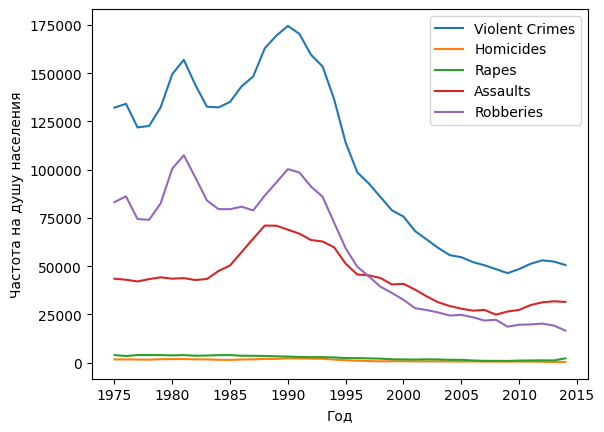

In [378]:
plt.plot(df_NY['report_year'], df_NY['violent_crimes'], label='Violent Crimes')
plt.plot(df_NY['report_year'], df_NY['homicides'], label='Homicides')
plt.plot(df_NY['report_year'], df_NY['rapes'], label='Rapes')
plt.plot(df_NY['report_year'], df_NY['assaults'], label='Assaults')
plt.plot(df_NY['report_year'], df_NY['robberies'], label='Robberies')

plt.xlabel('Год')
plt.ylabel('Частота на душу населения')
plt.legend()
plt.show()

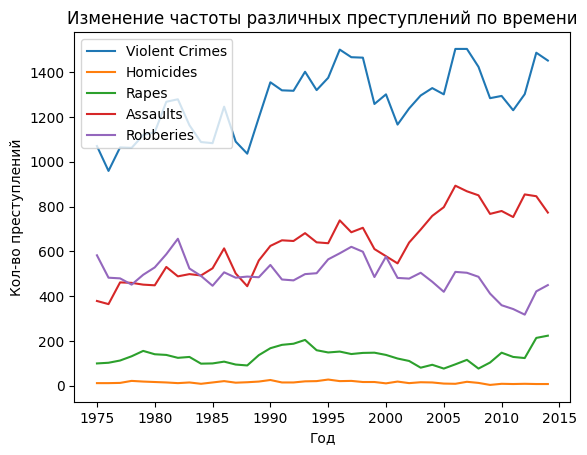

In [376]:
plt.plot(df_SL['report_year'], df_SL['violent_crimes'], label='Violent Crimes')
plt.plot(df_SL['report_year'], df_SL['homicides'], label='Homicides')
plt.plot(df_SL['report_year'], df_SL['rapes'], label='Rapes')
plt.plot(df_SL['report_year'], df_SL['assaults'], label='Assaults')
plt.plot(df_SL['report_year'], df_SL['robberies'], label='Robberies')

plt.xlabel('Год')
plt.ylabel('Кол-во преступлений')
plt.legend()
plt.show()

Взглянув на таблицу, сделайте вывод о данных.

В NY статистика схожа с общей статистикой,
в SL существенно отличается

Получите сводную таблицу частот преступлений в различных городах. Посмотрите на их изменение в самом крупном/мелком городе, в городах с наибольшей наименьшей преступностью.

In [347]:
# Your code here
df.columns

Index(['report_year', 'agency_code', 'agency_jurisdiction', 'population',
       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',
       'months_reported', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita',
       'violent_crimes_percapita'],
      dtype='object')

In [393]:
df_crime_freq = df.groupby('agency_jurisdiction')[['population','crimes_percapita']].mean('crimes_percapita').reset_index().sort_values(by='population', ascending=False)
df_crime_freq

,agency_jurisdiction,population,crimes_percapita
41,"New York City, NY",7630666.950,0.014156
29,"Los Angeles, CA",3475544.825,0.014296
10,"Chicago, IL",2893460.075,0.016812
22,"Houston, TX",1843945.875,0.010736
47,"Philadelphia, PA",1599589.225,0.011856
...,...,...,...
1,"Arlington, TX",275656.225,0.005741
52,"Raleigh, NC",254234.500,0.006254
3,"Aurora, CO",242877.800,0.008141
46,"Orlando, FL",178428.475,0.017374


In [397]:
df_group_town = df.groupby('agency_jurisdiction')[['population','violent_crimes','homicides','rapes','assaults','robberies','crimes_percapita']].mean('population').sort_values(by= 'population', ascending=False).reset_index()

In [398]:
df_group_town

,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita
0,"New York City, NY",7630666.950,105329.900,1170.600,2488.775,43937.975,57732.550,0.014156
1,"Los Angeles, CA",3475544.825,48850.250,642.925,1688.475,25350.450,21168.400,0.014296
2,"Chicago, IL",2893460.075,48405.575,681.225,2219.425,23467.525,22037.400,0.016812
3,"Houston, TX",1843945.875,19938.625,371.900,980.525,8921.225,9664.975,0.010736
4,"Philadelphia, PA",1599589.225,18676.725,357.750,899.900,7364.025,10055.050,0.011856
...,...,...,...,...,...,...,...,...
63,"Arlington, TX",275656.225,1658.375,13.350,120.400,1026.975,497.650,0.005741
64,"Raleigh, NC",254234.500,1561.075,17.625,82.250,900.050,561.150,0.006254
65,"Aurora, CO",242877.800,1898.675,14.250,153.325,1264.950,466.150,0.008141
66,"Orlando, FL",178428.475,3061.975,21.275,148.800,1974.025,917.875,0.017374


Постройте графики

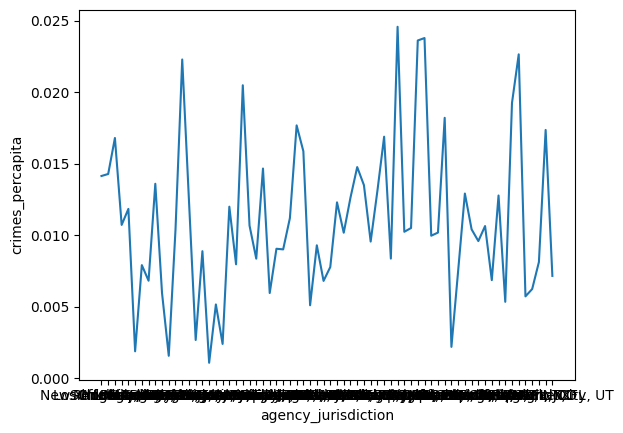

In [407]:
# Your code here
plt.plot(df_group_town['agency_jurisdiction'], df_group_town['crimes_percapita'])
# plt.plot(df_group_town['agency_jurisdiction'], df_group_town['homicides'], label='Homicides')
# plt.plot(df_group_town['agency_jurisdiction'], df_group_town['rapes'], label='Rapes')
# plt.plot(df_group_town['agency_jurisdiction'], df_group_town['assaults'], label='Assaults')
# plt.plot(df_group_town['agency_jurisdiction'], df_group_town['robberies'], label='Robberies')

plt.xlabel('agency_jurisdiction')
plt.ylabel('crimes_percapita')
plt.show()

In [403]:
df_group_town_violent_crimes = df.groupby('agency_jurisdiction')[['population','violent_crimes','homicides','rapes','assaults','robberies','crimes_percapita']].mean('crimes_percapita').sort_values(by= 'violent_crimes', ascending=False).reset_index()

In [404]:
df_group_town_violent_crimes

,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita
0,"New York City, NY",7630666.950,105329.900,1170.600,2488.775,43937.975,57732.550,0.014156
1,"Los Angeles, CA",3475544.825,48850.250,642.925,1688.475,25350.450,21168.400,0.014296
2,"Chicago, IL",2893460.075,48405.575,681.225,2219.425,23467.525,22037.400,0.016812
3,"Detroit, MI",1019069.900,22653.925,480.050,1008.175,10334.400,10831.300,0.022300
4,"Houston, TX",1843945.875,19938.625,371.900,980.525,8921.225,9664.975,0.010736
...,...,...,...,...,...,...,...,...
63,"Arlington, TX",275656.225,1658.375,13.350,120.400,1026.975,497.650,0.005741
64,"Raleigh, NC",254234.500,1561.075,17.625,82.250,900.050,561.150,0.006254
65,"Salt Lake City, UT",177091.550,1268.675,14.050,130.600,630.575,493.450,0.007171
66,"Virginia Beach, VA",376337.700,835.400,16.500,102.875,328.775,387.250,0.002210


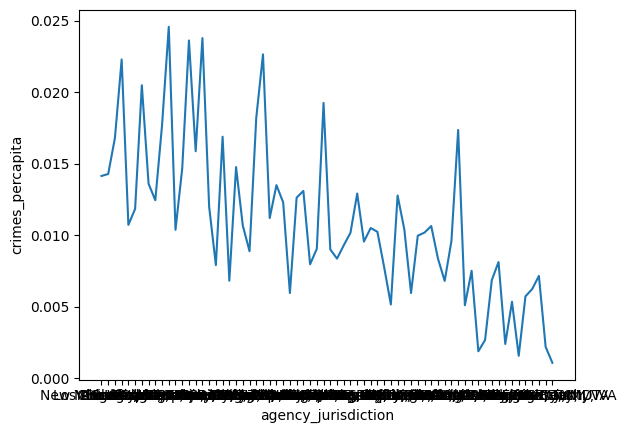

In [410]:
plt.plot(df_group_town_violent_crimes['agency_jurisdiction'], df_group_town_violent_crimes['crimes_percapita'])
# plt.plot(df_group_town_violent_crimes['agency_jurisdiction'], df_group_town_violent_crimes['homicides'], label='Homicides')
# plt.plot(df_group_town_violent_crimes['agency_jurisdiction'], df_group_town_violent_crimes['rapes'], label='Rapes')
# plt.plot(df_group_town_violent_crimes['agency_jurisdiction'], df_group_town_violent_crimes['assaults'], label='Assaults')
# plt.plot(df_group_town_violent_crimes['agency_jurisdiction'], df_group_town_violent_crimes['robberies'], label='Robberies')

plt.xlabel('agency_jurisdiction')
plt.ylabel('crimes_percapita')
plt.show()

Можно ли сказать, что наименьшие по размеру/уровню преступности города обходят общие тренды?

Но вернемся к проверке линейной зависимости. Будем рассматривать зависимость числа всех преступлений от размера населения городов.

In [10]:
# Your code here

In [11]:
# Your code here

Воспользуйте regplot из пакета Seaborn

In [12]:
# Your code here

In [13]:
# Your code here

Посчитайте корреляцию пирсона

In [14]:
# Your code here

In [15]:
# Your code here

Есть ли корреляция между частотами преступления и числа городов?
А если посмотреть на города с населением больше 1.5 млн?
Расммотрите их отдельно ниже

In [16]:
# Your code here

In [17]:
# Your code here

Какой вывод можно сделать? Если тренды для преступности? Можно ли это достоверно утверждать?

## Проверка на нормальность частот преступлений

Посмотрим на распределение частот преступлений в различных городах. Вряд ли стоит ожидать, что распределение окажется нормальным, но ради эксперимента, можно попробовать.

In [18]:
# Your code here

In [19]:
# Your code here

Попробуйте также посмотреть по различным преступлениям.

Проведите дополнительный анализ, визуализируйте различные признаки и зависимости между ними.